## Estimate Hover Tag and Lines
This code creates two csv files in the datasets folder
1. "estimates_full.csv" has a column of the text of the hover tag in it for competition/mutualism
2. "estimates_lines.csv" is the same but only includes subreddits where the estimate has a z-score above 2 or below -2. These are the only lines that are going to be shown when the user clicks "competition/mutualism" for lines.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pairwise = pd.read_csv("datasets/pairwise_variables.csv")

In [53]:
# remove estimates wih p-value over 0.05
# create column of standardized values
estimates_full = pairwise
estimates_full['new_estimate'] = estimates_full.loc[estimates_full['Std. Error'] < 0.05, 'Estimate']
estimates_full = estimates_full.loc[estimates_full['new_estimate'].notnull()]
estimates_full['new_estimate_scaled'] = (estimates_full['new_estimate'] - estimates_full['new_estimate'].mean()) / estimates_full['new_estimate'].std()  

# Define intervals based on z-score and label them in the column "hover tag"
conditions = [
    (estimates_full['new_estimate_scaled'] > 3),
    (estimates_full['new_estimate_scaled'] <= 3) & (estimates_full['new_estimate_scaled'] > 2),
    (estimates_full['new_estimate_scaled'] <= 2) & (estimates_full['new_estimate_scaled'] > 1),
    (estimates_full['new_estimate_scaled'] <= 1) & (estimates_full['new_estimate_scaled'] > 0),
    (estimates_full['new_estimate_scaled'] <= 0) & (estimates_full['new_estimate_scaled'] > -1),
    (estimates_full['new_estimate_scaled'] <= -1) & (estimates_full['new_estimate_scaled'] > -2),
    (estimates_full['new_estimate_scaled'] <= -2) & (estimates_full['new_estimate_scaled'] > -3),
    (estimates_full['new_estimate_scaled'] <= -3)
]

choices = [
    'most mutualistic',
    'very mutualistic',
    'somewhat mutualistic',
    'a little mutualistic',
    'a little competitive',
    'somewhat competitive',
    'very competitive',
    'most competitive']

estimates_full['hover_tag'] = np.select(conditions, choices)

# Create a dataframe only of the most competitive and mutualistic rows
estimates_lines = estimates_full[np.abs(estimates_full['new_estimate_scaled']) > 2]

# export dataframes to csv
estimates_full.to_csv("datasets/estimates_full.csv")
estimates_lines.to_csv("datasets/estimates_lines.csv")

C:\Users\addie\AppData\Local\Temp/ipykernel_23252/4178095863.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimates_full['new_estimate_scaled'] = (estimates_full['new_estimate'] - estimates_full['new_estimate'].mean()) / estimates_full['new_estimate'].std()
C:\Users\addie\AppData\Local\Temp/ipykernel_23252/4178095863.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimates_full['hover_tag'] = np.select(conditions, choices)


## Cross-posting %
This code creates two csv files in the datasets folder
1. "estimates_full.csv" has a column of the text of the hover tag in it for competition/mutualism
2. "estimates_lines.csv" is the same but only includes subreddits where the estimate has a z-score above 2 or below -2. These are the only lines that are going to be shown when the user clicks "competition/mutualism" for lines.

1354


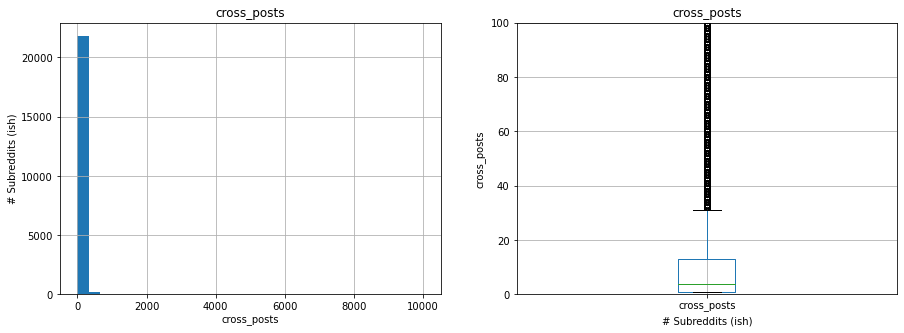

In [66]:
cp_full = pairwise[pairwise['cross_posts'] != 0]
cp_lines = pairwise[pairwise['cross_posts'] > 100]

print(len(cp_lines))

plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
term_plot = cp['cross_posts'].hist(bins=30)
plt.xlabel('cross_posts')
plt.ylabel('# Subreddits (ish)')
plt.title('cross_posts')

plt.subplot(1, 2, 2)
term_boxplot = cp.boxplot('cross_posts')  
plt.ylabel('cross_posts')
plt.xlabel('# Subreddits (ish)')
plt.ylim(0, 100)
plt.title('cross_posts')
plt.savefig("datavizzes/cross_posts.jpg")



cp.to_csv("datasets/cross_posting_lines.csv")
